# Análise de Dados de Produção de Sementes   

Este notebook contém um estudo exploratório completo sobre dados agrícolas, com foco em produtividade, sazonalidade e tendências.

## Importação de Bibliotecas

Nesta etapa, importei as bibliotecas necessárias para manipulação de dados e visualização gráfica.

In [2]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Para trabalhar com datas
from datetime import datetime

# Para conectar ao banco de dados SQLite e rodar consultas SQL dentro do Python
import sqlite3


## Carregamento dos Dados

Carreguei o dataset para visualizar as primeiras linhas e entender sua estrutura.

In [3]:
# Carregar o dataset
df = pd.read_excel('sigefcamposproducaodesementes.xlsx') 

# Exibir as primeiras linhas
df.head()


,Safra,Especie,Categoria,Cultivar,Municipio,UF,Status,Data do Plantio,Data de Colheita,Area,Producao bruta,Producao estimada
0,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,01/01/2013,NaN,95,NaN,38
1,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,05/01/2013,NaN,6,NaN,24
2,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,10/01/2013,NaN,95,NaN,38
3,2013/2013,Zea mays L.,S2,BRS Gorutuba,Petrolina,PE,Homologado,03/02/2013,NaN,45,NaN,1575
4,2013/2013,Zea mays L.,S2,BRS Gorutuba,Petrolina,PE,Homologado,27/01/2013,NaN,16,NaN,56


## Verificação e Limpeza de Dados

Antes da análise, foi preciso verificar e limpar os dados. Isso incluiu:
- Identificação valores ausentes
- Conversão colunas de datas
- Remoção dados inconsistentes
- Criação colunas úteis para análises futuras

In [4]:
# Verificar valores nulos
df.isnull().sum()

# Converter colunas de datas para o formato correto
df['Data do Plantio'] = pd.to_datetime(df['Data do Plantio'], errors='coerce')
df['Data de Colheita'] = pd.to_datetime(df['Data de Colheita'], errors='coerce')

# Definir a data limite
data_limite = pd.to_datetime('2025-12-31')

# Excluir datas superiores a 2025
df = df[(df['Data de Colheita'] <= data_limite) & (df['Data do Plantio'] <= data_limite)]

# Remover linhas com valores nulos em colunas críticas
df.dropna(subset=['Data do Plantio', 'Data de Colheita', 'Producao bruta', 'Area'], inplace=True)

# Criar uma nova coluna para calcular o tempo entre plantio e colheita
df['Tempo_Ciclo'] = (df['Data de Colheita'] - df['Data do Plantio']).dt.days

#Criar uma nova coluna para calcular a produtividade
df['Produtividade'] = df['Producao bruta'] / df['Area']

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 72396 entries, 1737 to 495599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Safra              72396 non-null  object        
 1   Especie            72396 non-null  object        
 2   Categoria          72395 non-null  object        
 3   Cultivar           72396 non-null  object        
 4   Municipio          72396 non-null  object        
 5   UF                 72396 non-null  object        
 6   Status             72396 non-null  object        
 7   Data do Plantio    72396 non-null  datetime64[ns]
 8   Data de Colheita   72396 non-null  datetime64[ns]
 9   Area               72396 non-null  int64         
 10  Producao bruta     72396 non-null  float64       
 11  Producao estimada  72396 non-null  int64         
 12  Tempo_Ciclo        72396 non-null  int64         
 13  Produtividade      72396 non-null  float64       
dtypes: date

## Análise Descritiva

Aqui analisei os dados estatísticos do dataset.

In [5]:
# Análise descritiva

df.describe()

,Data do Plantio,Data de Colheita,Area,Producao bruta,Producao estimada,Tempo_Ciclo,Produtividade
count,72396,72396,7.239600e+04,7.239600e+04,7.239600e+04,72396.000000,7.239600e+04
mean,2021-04-26 16:38:16.171059200,2022-01-05 23:40:19.691695616,9.473389e+02,1.382682e+05,6.165649e+03,254.293096,1.605058e+03
min,1994-10-12 00:00:00,2002-10-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,-8010.000000,0.000000e+00
25%,2019-10-10 00:00:00,2020-04-06 00:00:00,2.400000e+01,1.400000e+02,9.100000e+01,105.000000,2.345666e+00
50%,2021-12-10 00:00:00,2022-06-01 00:00:00,5.200000e+01,3.466000e+03,2.320000e+02,201.000000,4.635102e+01
75%,2023-04-03 00:00:00,2023-10-10 00:00:00,1.170000e+02,3.031625e+04,6.630000e+02,307.000000,4.146444e+02
max,2024-12-11 00:00:00,2025-12-27 00:00:00,3.905429e+06,5.570826e+09,3.660995e+07,11168.000000,5.743119e+07
std,NaN,NaN,3.468789e+04,2.071759e+07,1.977725e+05,603.174183,2.135506e+05


<p>Variabilidade Significativa: Há uma grande variabilidade nos dados, especialmente na produção bruta, produção estimada, tempo de ciclo e produtividade. Isso pode ser devido a diferentes práticas agrícolas, condições climáticas, tipos de solo, e outros fatores.</p>
<p>Distribuição dos Dados: A análise dos quartis mostra que a maioria dos dados está concentrada em torno de valores centrais, mas há outliers significativos que podem estar influenciando as médias e desvios padrão.</p>
<p>Planejamento e Intervenção: Esses insights podem ajudar a identificar áreas que precisam de intervenção, como a implementação de práticas agrícolas mais consistentes, e a mitigação de fatores que causam variabilidade extrema na produção e produtividade.</p>

## Tendência da Produção Agrícola

Aqui analisei como a produção agrícola evoluiu ao longo dos anos.

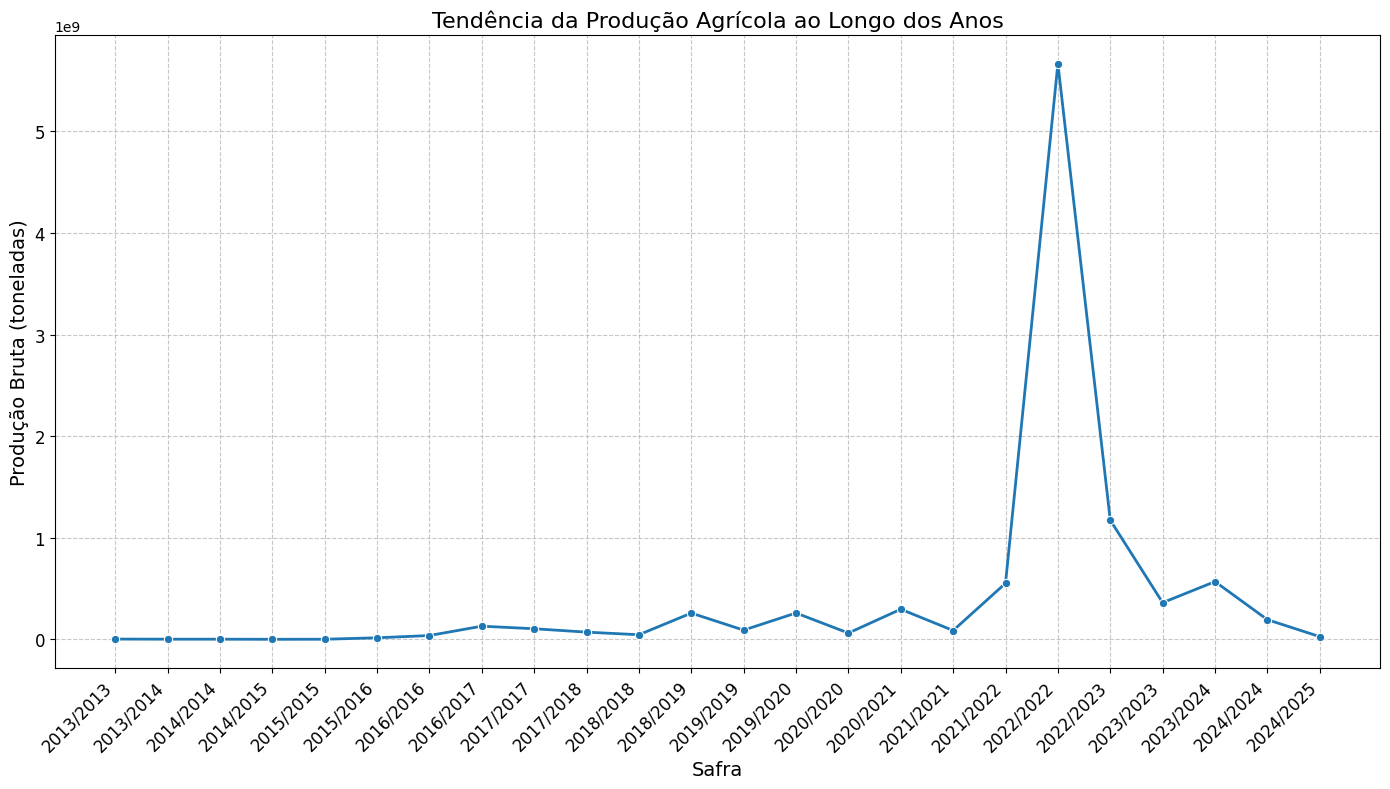

In [6]:
# Garantir que as colunas de data estejam no formato datetime
df['Data de Colheita'] = pd.to_datetime(df['Data de Colheita'], errors='coerce')
df['Data do Plantio'] = pd.to_datetime(df['Data do Plantio'], errors='coerce')

# Excluir datas superiores a 2025
data_limite = pd.to_datetime('2025-12-31')
df = df[(df['Data de Colheita'] <= data_limite) & (df['Data do Plantio'] <= data_limite)]

# Verificar se a coluna 'Safra' existe no DataFrame
if 'Safra' in df.columns:
    # Agrupar produção por safra
    df_grouped = df.groupby('Safra')['Producao bruta'].sum().reset_index()

    # Criar gráfico de linha para visualizar a tendência
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_grouped, x='Safra', y='Producao bruta', marker='o', linewidth=2)
    plt.title('Tendência da Produção Agrícola ao Longo dos Anos', fontsize=16)
    plt.xlabel('Safra', fontsize=14)
    plt.ylabel('Produção Bruta (toneladas)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()  # Ajustar o layout para evitar sobreposição
    plt.show()
else:
    print("Erro: O DataFrame não contém a coluna 'Safra'.")

<p>O gráfico destaca um evento significativo na produção agrícola durante o ano de safra 2021/2022, seguido por uma queda nos anos subsequentes. Este aumento abrupto pode indicar um ano excepcionalmente bom em termos de produção agrícola, possivelmente devido a condições climáticas favoráveis, melhorias nas práticas agrícolas, ou a introdução de novas tecnologias ou cultivares.
</p>
<p>Após o pico em 2021/2022, há uma queda acentuada na produção nos anos subsequentes (2022/2023 e 2023/2024). Isso pode sugerir que o pico foi um evento isolado e que a produção voltou a níveis mais normais nos anos seguintes. A queda pode ser atribuída a fatores como condições climáticas adversas, pragas, doenças, ou mudanças nas políticas agrícolas.</p>
<p>O pico e a queda abrupta na produção sugerem a necessidade de uma investigação mais aprofundada para identificar os fatores específicos que contribuíram para essas mudanças. Isso pode envolver a análise de dados meteorológicos, práticas de cultivo, e outros fatores relevantes.</p>


## Tendências por estado

O gráfico de barras horizontal exibindo a produtividade média por estado (UF) é uma ferramenta visual poderosa para entender a distribuição da produtividade agrícola em diferentes regiões.

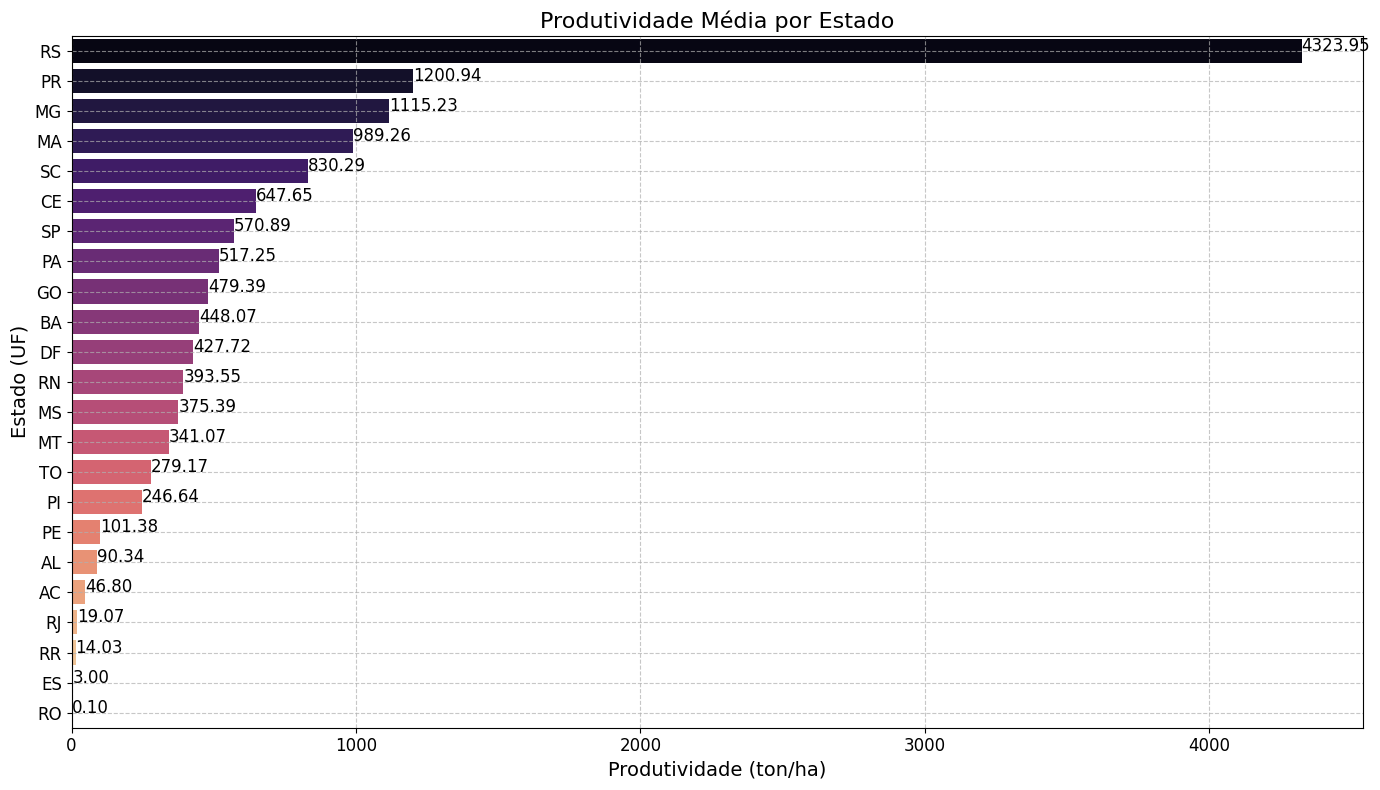

In [13]:
# Calcular a produtividade média por estado (UF)
df_estado = df.groupby('UF')['Produtividade'].mean().reset_index()

# Ordenar os estados pela produtividade média
df_estado = df_estado.sort_values(by='Produtividade', ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=df_estado, x='Produtividade', y='UF', hue='UF', palette='magma', dodge=False, legend=False)
plt.title('Produtividade Média por Estado', fontsize=16)
plt.xlabel('Produtividade (ton/ha)', fontsize=14)
plt.ylabel('Estado (UF)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar rótulos de valores nas barras
for index, value in enumerate(df_estado['Produtividade']):
    barplot.text(value, index, f'{value:.2f}', color='black', ha="left", fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()

<h3>Produtividade Excepcional no Rio Grande do Sul:</h3>

O estado do Rio Grande do Sul (RS) apresenta a maior produtividade média, com 4.323,95 toneladas por hectare. Este valor é significativamente maior do que o dos outros estados, sugerindo que RS possui práticas agrícolas altamente eficientes, condições climáticas favoráveis, ou ambos.

<h3>Alto Desempenho em Paraná e Minas Gerais:</h3>

Paraná (PR) e Minas Gerais (MG) também mostram produtividades médias altas, com 1.200,94 e 1.115,23 toneladas por hectare, respectivamente. Esses estados podem estar utilizando tecnologias avançadas, variedades de sementes de alto rendimento, ou práticas de manejo superiores.

<h3>Variabilidade Significativa:</h3>

Há uma grande variabilidade na produtividade média entre os estados. Enquanto alguns estados como RS, PR e MG têm produtividades muito altas, outros estados como Rondônia (RO), Roraima (RR) e Espírito Santo (ES) têm produtividades muito baixas. Isso pode ser devido a diferenças nas condições climáticas, tipos de solo, acesso a tecnologias agrícolas, e práticas de manejo.

<h3>Estados com Produtividade Baixa:</h3>

Estados como Rondônia (RO), Roraima (RR), e Espírito Santo (ES) apresentam produtividades médias muito baixas, com valores de 0,10, 14,03 e 3,00 toneladas por hectare, respectivamente. Esses estados podem enfrentar desafios significativos, como condições climáticas adversas, solos de baixa fertilidade, ou falta de acesso a tecnologias agrícolas modernas.

<h3>Necessidade de Intervenção:</h3>

Os estados com produtividade baixa podem se beneficiar de intervenções específicas, como programas de capacitação para agricultores, investimentos em infraestrutura agrícola, e pesquisa e desenvolvimento de variedades de sementes mais adequadas às condições locais.

<h3>Distribuição de Recursos:</h3>

A análise pode ajudar na distribuição mais eficiente de recursos e esforços de desenvolvimento agrícola. Estados com baixa produtividade podem ser priorizados para receber suporte técnico e financeiro para melhorar suas práticas agrícolas e aumentar a produtividade.

## Estudo das culturas

O gráfico de barras horizontal exibindo a contagem das espécies agrícolas mais frequentes (top 20) é uma ferramenta visual essencial para entender a distribuição das culturas plantadas.

Ele permite identificar rapidamente quais espécies agrícolas são mais cultivadas. Isso é crucial para entender as preferências dos agricultores e a importância relativa de diferentes culturas na produção agrícola.

Conhecer as culturas mais frequentes ajuda na alocação eficiente de recursos, como sementes, fertilizantes e assistência técnica. As culturas predominantes podem receber mais atenção em termos de pesquisa e desenvolvimento para melhorar a produtividade e a resistência a pragas e doenças.

Para empresas e organizações envolvidas na cadeia de suprimentos agrícolas, o gráfico fornece insights sobre a demanda por diferentes espécies. Isso pode orientar decisões de produção, marketing e distribuição.

 Para formuladores de políticas, pesquisadores e agricultores, o gráfico fornece informações valiosas que podem orientar decisões sobre políticas agrícolas, programas de apoio e práticas de manejo.

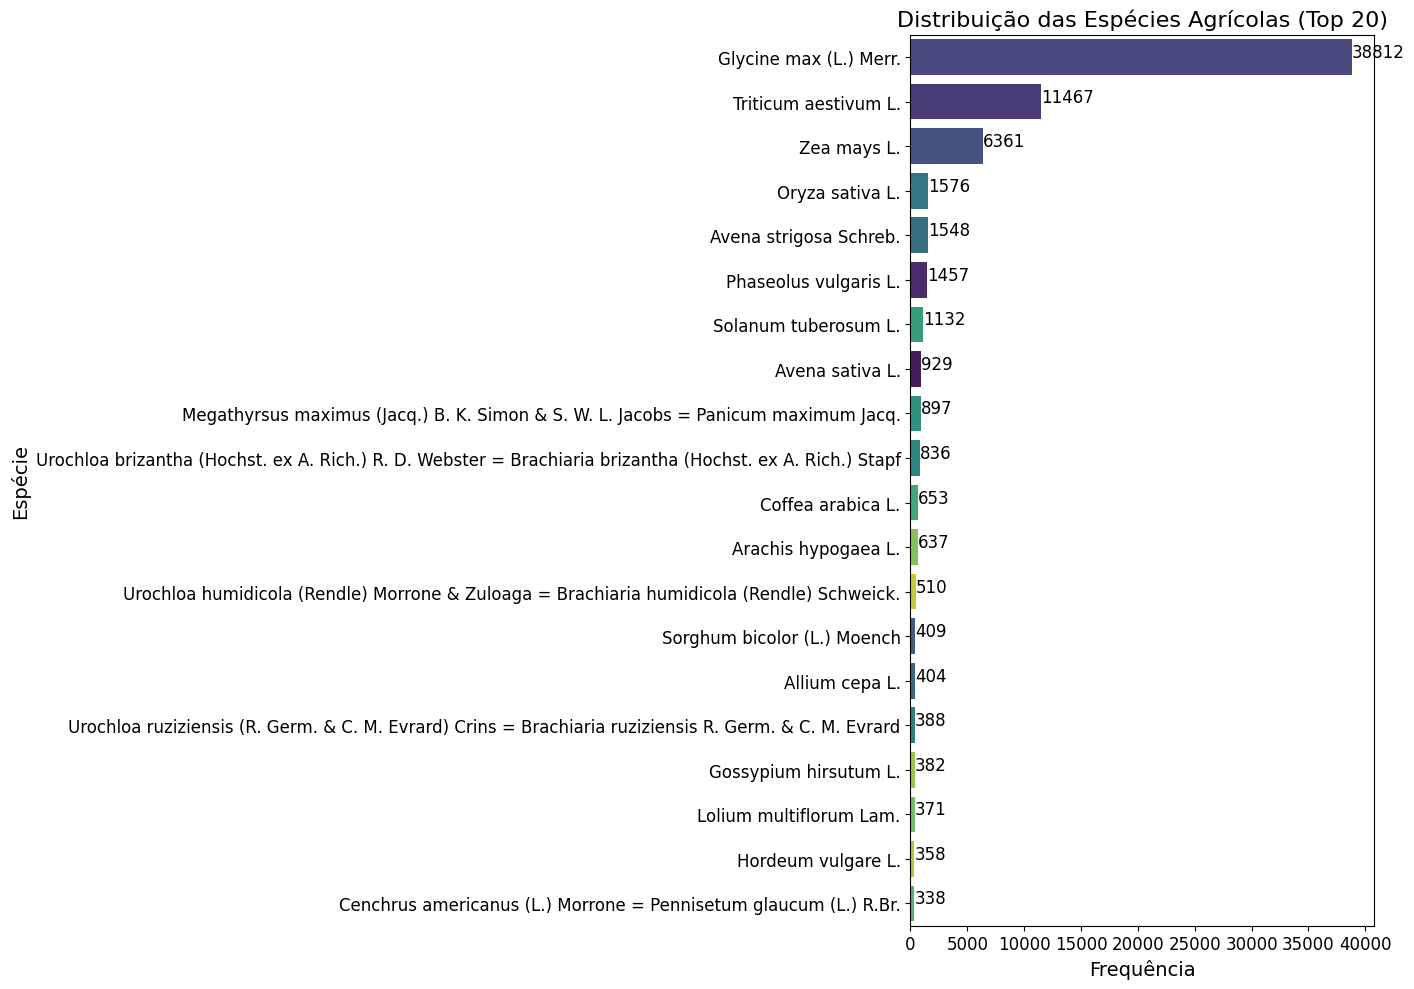

In [8]:
# Contagem de culturas
plt.figure(figsize=(14, 10))

# Limitar o número de espécies exibidas para as top 20 mais frequentes
top_n = 20
top_species = df['Especie'].value_counts().nlargest(top_n).index

# Criar gráfico de barras
sns.countplot(data=df[df['Especie'].isin(top_species)], y='Especie', hue= 'Especie', order=top_species, palette='viridis')
plt.title('Distribuição das Espécies Agrícolas (Top 20)', fontsize=16)
plt.xlabel('Frequência', fontsize=14)
plt.ylabel('Espécie', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionar rótulos de valores nas barras
for index, value in enumerate(df['Especie'].value_counts().nlargest(top_n)):
    plt.text(value, index, f'{value}', color='black', ha="left", fontsize=12)

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

<h3>Predominância de Glycine max (L.) Merr. (Soja):</h3>

A espécie Glycine max (L.) Merr., conhecida como soja, é a mais cultivada, com uma frequência de 35.012. Isso indica que a soja é a cultura predominante entre os agricultores, possivelmente devido à sua alta demanda no mercado, tanto para consumo humano quanto para ração animal, além de seu uso na produção de óleo vegetal e biodiesel. A soja também é conhecida por sua capacidade de fixar nitrogênio no solo, o que pode melhorar a fertilidade do solo para culturas subsequentes.

<h3>Importância de Triticum aestivum L. (Trigo) e Zea mays L. (Milho):</h3>

As espécies Triticum aestivum L. (trigo) e Zea mays L. (milho) são as segunda e terceira mais cultivadas, com frequências de 11.467 e 6.361, respectivamente. Isso sugere que essas culturas também são altamente valorizadas pelos agricultores. O trigo é uma cultura essencial para a produção de alimentos básicos, como pão e massas, enquanto o milho é amplamente utilizado tanto para consumo humano quanto para ração animal. A alta frequência dessas culturas reflete sua importância econômica e nutricional.

<h3>Diversidade de Culturas:</h3>

O gráfico mostra uma diversidade razoável de culturas, com as 20 espécies mais frequentes variando de leguminosas a cereais e forrageiras. Além das culturas predominantes, como soja, trigo e milho, outras espécies como Oryza sativa L. (arroz), Phaseolus vulgaris L. (feijão) e Coffea arabica L. (café) também são cultivadas em quantidades significativas. Essa diversidade é importante para a sustentabilidade agrícola, pois a rotação de culturas pode ajudar a prevenir a exaustão do solo, reduzir a incidência de pragas e doenças, e melhorar a resiliência do sistema agrícola às mudanças climáticas.

## Sazonalidade das Colheitas

A análise da sazonalidade das colheitas é essencial para entender os padrões de produção agrícola ao longo do ano.

Conhecer os períodos de colheita mais frequentes ajuda os agricultores a planejar suas atividades agrícolas, como plantio, irrigação e aplicação de fertilizantes, de maneira mais eficaz.

A sazonalidade das colheitas permite uma melhor gestão dos recursos, como mão de obra, maquinário e armazenamento. Saber quando as colheitas são mais intensas ajuda a alocar recursos de forma mais inteligente.

Para empresas e organizações envolvidas na cadeia de suprimentos agrícolas, entender a sazonalidade das colheitas ajuda a prever a oferta de produtos agrícolas no mercado, permitindo uma melhor gestão de estoques e estratégias de marketing.

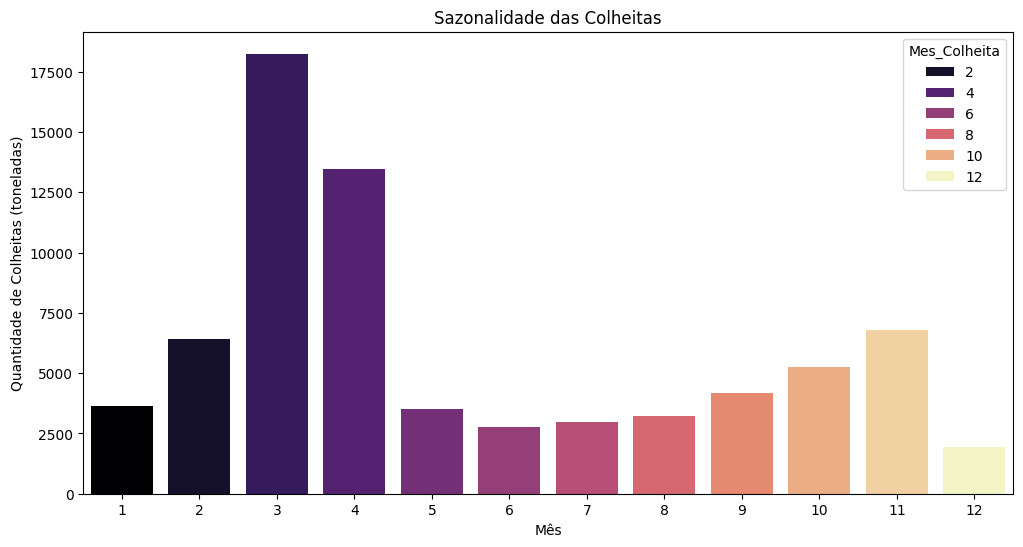

In [18]:
# Extrair o mês da colheita
df['Mes_Colheita'] = df['Data de Colheita'].dt.month

# Criar gráfico de sazonalidade
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Mes_Colheita', hue='Mes_Colheita', palette='magma')
plt.title('Sazonalidade das Colheitas')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Colheitas (toneladas)')
plt.show()


<h3>Pico de Colheitas em Março e Abril:</h3>

O gráfico mostra que os meses de março e abril têm a maior quantidade de colheitas, com picos significativos em comparação com outros meses. Isso sugere que muitas culturas atingem a maturidade e são colhidas durante esses meses. Esse padrão pode ser influenciado por fatores climáticos, como a estação chuvosa ou seca, que afetam o crescimento das plantas.

<h3>Baixa Atividade de Colheita em Maio a Julho:</h3>

Os meses de maio a julho apresentam uma quantidade relativamente baixa de colheitas. Isso pode indicar um período de entressafra, onde poucas culturas estão prontas para a colheita. Durante esses meses, os agricultores podem focar em atividades de preparação do solo, plantio de novas culturas ou manutenção das plantações.

<h3>Aumento Gradual de Colheitas no Final do Ano:</h3>

A quantidade de colheitas aumenta gradualmente a partir de agosto, atingindo um segundo pico em novembro. Isso sugere que há uma segunda temporada de colheita significativa no final do ano. Esse padrão pode ser devido a culturas de ciclo mais curto ou a práticas de plantio escalonado, onde diferentes culturas são plantadas em diferentes épocas para garantir uma colheita contínua ao longo do ano.

## Conexão com SQLite e Consultas SQL

Agora, utilizei o sqlite para rodar consultas SQL em Python e responder algumas questões relativas ao negócio.

1️⃣ Qual foi a produção total por safra e espécie?

In [11]:
# Criar conexão com SQLite
conn = sqlite3.connect(":memory:")  # Criando um banco de dados temporário na memória

# Salvar o dataframe como tabela SQL
df.to_sql("producao_sementes", conn, index=False, if_exists="replace")

query = """
SELECT Safra, Especie, SUM("Producao bruta") AS Total_Producao
FROM producao_sementes
GROUP BY Safra, Especie
ORDER BY Safra DESC, Total_Producao DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Safra,Especie,Total_Producao
0,2024/2025,Zea mays L.,17142760.0
1,2024/2025,Glycine max (L.) Merr.,6706821.0
2,2024/2025,Phaseolus vulgaris L.,1910201.0
3,2024/2025,Oryza sativa L.,937757.0
4,2024/2025,Solanum tuberosum L.,98454.0
...,...,...,...
907,2013/2013,Triticum aestivum L.,32775.0
908,2013/2013,Phaseolus vulgaris L.,58.0
909,2013/2013,Sorghum bicolor (L.) Moench,52.0
910,2013/2013,Allium cepa L.,24.0


2️⃣ Quais as diferenças entre a produção bruta e a estimada?

In [19]:
query = """
SELECT Safra, Especie, SUM("Producao bruta") AS Produzido, SUM("Producao estimada") AS Estimado,
       (SUM("Producao bruta") - SUM("Producao estimada")) AS Diferenca
FROM producao_sementes
GROUP BY Safra, Especie
ORDER BY Safra DESC, Diferenca DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Safra,Especie,Produzido,Estimado,Diferenca
0,2024/2025,Zea mays L.,17142760.0,79804,17062956.0
1,2024/2025,Glycine max (L.) Merr.,6706821.0,214176,6492645.0
2,2024/2025,Phaseolus vulgaris L.,1910201.0,23895,1886306.0
3,2024/2025,Oryza sativa L.,937757.0,2041,935716.0
4,2024/2025,Solanum tuberosum L.,98454.0,2843,95611.0
...,...,...,...,...,...
907,2013/2013,Triticum aestivum L.,32775.0,528,32247.0
908,2013/2013,Phaseolus vulgaris L.,58.0,10,48.0
909,2013/2013,Sorghum bicolor (L.) Moench,52.0,44,8.0
910,2013/2013,Solanum lycopersicum L. = Lycopersicon esculen...,13.0,6,7.0


3️⃣ Quais estados tem maior produtividade agrícola?

In [ ]:
query = """
SELECT UF, SUM("Producao bruta") / SUM(Area) AS Produtividade_Media
FROM producao_sementes
GROUP BY UF
ORDER BY Produtividade_Media DESC;
"""
# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

4️⃣ Quais safras tiveram maior crescimento na produção?

In [ ]:
query = """
SELECT Safra, SUM("Producao bruta") AS Total_Producao,
       (SUM("Producao bruta") - LAG(SUM("Producao bruta")) OVER (ORDER BY Safra)) / 
       NULLIF(LAG(SUM("Producao bruta")) OVER (ORDER BY Safra), 0) * 100 AS Crescimento_Percentual
FROM producao_sementes
GROUP BY Safra
ORDER BY Safra DESC;
"""
# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

5️⃣ Como se deu a evolução da produtividade ao longo dos anos?

In [ ]:
query = """
SELECT Safra, AVG(Produtividade) AS Media_Produtividade
FROM producao_sementes
GROUP BY Safra
ORDER BY Safra DESC;
"""
# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

6️⃣ Quais os municípios com maior produção de sementes?

In [ ]:
query = """
SELECT Municipio, UF, SUM("Producao bruta") AS Total_Producao
FROM producao_sementes
GROUP BY Municipio, UF
ORDER BY Total_Producao DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

7️⃣Quais os municípios com melhor produtividade agrícola?

In [ ]:
# Consulta SQL corrigida
query = """
SELECT Municipio, UF, AVG(Produtividade) AS Media_Produtividade
FROM producao_sementes
GROUP BY Municipio, UF
ORDER BY Media_Produtividade DESC;

"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

8️⃣ Tempo médio entre plantio e colheita por espécie?

In [ ]:
# Consulta SQL corrigida
query = """
SELECT Especie, AVG("Data de Colheita" - "Data do Plantio") AS Tempo_Medio_Dias
FROM producao_sementes
GROUP BY Especie
ORDER BY Tempo_Medio_Dias DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

9️⃣ Estados que mais aumentaram a produção nos últimos 5 anos

In [ ]:
# Consulta SQL corrigida
query = """
WITH producao_por_ano AS (
    SELECT UF, Safra, SUM("Producao bruta") AS Total_Producao
    FROM producao_sementes
    GROUP BY UF, Safra
),
producao_ultimos_5_anos AS (
    SELECT UF, Safra, Total_Producao,
           LAG(Total_Producao, 1) OVER (PARTITION BY UF ORDER BY Safra) AS Producao_Ano_Anterior,
           LAG(Total_Producao, 5) OVER (PARTITION BY UF ORDER BY Safra) AS Producao_5_Anos_Atras
    FROM producao_por_ano
)
SELECT UF, Safra, Total_Producao,
       (Total_Producao - Producao_5_Anos_Atras) AS Aumento_Producao_5_Anos
FROM producao_ultimos_5_anos
WHERE Safra >= (SELECT MAX(Safra) - 4 FROM producao_sementes)
ORDER BY Aumento_Producao_5_Anos DESC
LIMIT 10;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

🔟 Tempo médio entre plantio e colheita por categoria de cultura.

In [ ]:
# Garantir que as colunas de data estejam no formato datetime
df['Data de Colheita'] = pd.to_datetime(df['Data de Colheita'], errors='coerce')
df['Data do Plantio'] = pd.to_datetime(df['Data do Plantio'], errors='coerce')

# Consulta SQL corrigida
query = """
SELECT Categoria, AVG(JULIANDAY("Data de Colheita") - JULIANDAY("Data do Plantio")) AS Tempo_Medio
FROM producao_sementes
GROUP BY Categoria
ORDER BY Tempo_Medio DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

1️⃣1️⃣ Ranking das espécies mais resilientes à variação de produtividade.

In [ ]:
# Consulta SQL Ranking das espécies mais resilientes à variação de produtividade
query = """
WITH produtividade_por_safra AS (
    SELECT Safra, Especie, AVG(Produtividade) AS Media_Produtividade
    FROM producao_sementes
    GROUP BY Safra, Especie
),
variacao_produtividade AS (
    SELECT Especie, MAX(Media_Produtividade) - MIN(Media_Produtividade) AS Variacao_Produtividade
    FROM produtividade_por_safra
    GROUP BY Especie
)
SELECT Especie, Variacao_Produtividade
FROM variacao_produtividade
ORDER BY Variacao_Produtividade ASC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

1️⃣2️⃣ Identificação de períodos ideais para o plantio de cada espécie.

In [ ]:
# Consulta SQL Identificação de períodos ideais para o plantio de cada espécie
query = """
SELECT Especie, strftime('%m-%d', AVG(julianday("Data do Plantio"))) AS Data_Media_Plantio
FROM producao_sementes
GROUP BY Especie
ORDER BY Data_Media_Plantio;
    """
# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

1️⃣3️⃣ Qual o impacto da categoria da cultura na produtividade média?

In [ ]:
# Consulta SQL para Impacto da categoria da cultura na produtividade média
query = """
SELECT Categoria, AVG(Produtividade) AS Media_Produtividade
FROM producao_sementes
GROUP BY Categoria
ORDER BY Media_Produtividade DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

1️⃣4️⃣ Comparação entre safras com base na eficiência produtiva.

In [ ]:

# Consulta SQl para Comparação entre safras com base na eficiência de produção
query = """ 
SELECT Safra, AVG(Produtividade) AS Media_Produtividade
FROM producao_sementes 
GROUP BY Safra 
    """
# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

1️⃣5️⃣ Qual a Cultura dominante em cada estado?

In [ ]:
# Consulta SQL para Cultura dominante em cada estado
query = """
SELECT UF, Especie, COUNT(Especie) AS Total_Culturas
FROM producao_sementes
GROUP BY UF, Especie
ORDER BY Total_Culturas DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)
                           
# Exibir o DataFrame resultante
df_sql

1️⃣6️⃣ Identificação de municípios com maior diversidade de culturas

In [ ]:
# Consulta SQL para Identificação de municípios com maior diversidade de culturas
query = """
SELECT Municipio, COUNT(DISTINCT Especie) AS Total_Culturas
FROM producao_sementes
GROUP BY Municipio
ORDER BY Total_Culturas DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn) 

# Exibir o DataFrame resultante
df_sql

1️⃣7️⃣ Diferença entre a produção planejada e a real por safra

In [ ]:
#Consulta SQL para diferença entre a produção planejada e a produção real por safra
query = """
SELECT Safra, SUM("Producao bruta") AS Producao_Real, SUM("Producao estimada") AS Producao_Planejada,
       SUM("Producao bruta") - SUM("Producao estimada") AS Diferenca
       FROM producao_sementes
GROUP BY Safra
ORDER BY Safra DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql